[View in Colaboratory](https://colab.research.google.com/github/nisar009/Kaggle_Notebooks/blob/master/Copy_of_Kg_iMat_fashion.ipynb)

**Kaggle iMaterialist Challenge (Fashion) at FGVC5**

Installing Pytorch and Fastai

In [0]:
%%capture
!pip install torch torchvision

In [0]:
%%capture
!pip install fastai

In [0]:
!pip install kaggle-cli

**Downloading Kaggle Data Set**

In [1]:
ls

data/  datalab/


In [0]:
!mkdir -p data/fashiondata && cd data/fashiondata && kg download -u nisar009 -p p@55w0rd -c imaterialist-challenge-fashion-2018

downloading https://www.kaggle.com/c/imaterialist-challenge-fashion-2018/download/test.json.zip

test.json.zip 100% |################################| Time: 0:00:00   1.1 MiB/s

downloading https://www.kaggle.com/c/imaterialist-challenge-fashion-2018/download/validation.json.zip

validation.json.zip 100% |##########################| Time: 0:00:00 503.5 KiB/s

downloading https://www.kaggle.com/c/imaterialist-challenge-fashion-2018/download/train.json.zip

train.json.zip 100% |###############################| Time: 0:00:01  15.2 MiB/s

downloading https://www.kaggle.com/c/imaterialist-challenge-fashion-2018/download/sample_submission.csv.zip

sample_submission.csv.zip 100% |####################| Time: 0:00:00   1.0 MiB/s



In [0]:
!cd data/fashiondata && ls

fashiondata


In [0]:
!cd data/fashiondata && unzip sample_submission.csv.zip && unzip train.json.zip && unzip test.json.zip && unzip validation.json.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   
Archive:  train.json.zip
  inflating: train.json              
Archive:  test.json.zip
  inflating: test.json               
Archive:  validation.json.zip
  inflating: validation.json         


In [0]:
!cd data/fashiondata && ls

sample_submission.csv	   test.json	  train.json	  validation.json
sample_submission.csv.zip  test.json.zip  train.json.zip  validation.json.zip


Create the data set

In [0]:
import pandas as pd
import json

PATH = 'data/fashiondata/'

train_set_file = f'{PATH}train.json'

js = open(train_set_file).read()
train_data_dict = json.loads(js)
len(train_data_dict)

4

In [0]:
train_data_dict['images'][:10]

[{'imageId': '1',
  'url': 'https://contestimg.wish.com/api/webimage/570f35feb2f4b95d223aa9b1-large'},
 {'imageId': '2',
  'url': 'https://contestimg.wish.com/api/webimage/5468f1c0d96b290ff8e5c805-large'},
 {'imageId': '3',
  'url': 'https://contestimg.wish.com/api/webimage/546410237d57f323e72ca414-large'},
 {'imageId': '4',
  'url': 'https://contestimg.wish.com/api/webimage/550b955fdd699c1a0351f84e-large'},
 {'imageId': '5',
  'url': 'https://contestimg.wish.com/api/webimage/54451f33355b4e0fd3028a30-large'},
 {'imageId': '6',
  'url': 'https://contestimg.wish.com/api/webimage/571e0b1cea3cc75d8a004f37-large'},
 {'imageId': '7',
  'url': 'https://contestimg.wish.com/api/webimage/52cbee3f34067e3d742181de-large'},
 {'imageId': '8',
  'url': 'https://contestimg.wish.com/api/webimage/53994b413060c60cb1df5dfb-large'},
 {'imageId': '9',
  'url': 'https://contestimg.wish.com/api/webimage/567179ed74c8b6615676e022-large'},
 {'imageId': '10',
  'url': 'https://contestimg.wish.com/api/webimage/562

Downloading the images with file name imageID

In [0]:
!cd data/fashiondata && mkdir -p images_train && ls

images_train		   test.json	  train.json.zip
sample_submission.csv	   test.json.zip  validation.json
sample_submission.csv.zip  train.json	  validation.json.zip


In [0]:
import urllib.request as url
import concurrent.futures as futures
import os

image_train_dir = os.path.join(PATH, 'images_train')
print(f"Downloading {len(train_data_dict['images'])} Images ...")
with futures.ThreadPoolExecutor(max_workers=30000) as executor:
  os.chdir(image_train_dir)
  for image in train_data_dict['images']:
    print(image)
    imageid = image['imageId']
    imageurl = image['url']
    #image_name = os.path.join(image_train_dir, f'{imageid}.jpg')
    image_name = f'{imageid}.jpg'
    executor.submit(url.urlretrieve, f'{imageurl}', image_name)

In [2]:
!cd /content/data/fashiondata/images_train && ls -1| wc -l

68518


In [0]:
os.chdir("/content/")

In [0]:
ls

data/  datalab/


Creating the train.csv which stores < imageid, labels>

In [0]:
print(train_data_dict['annotations'][:10])

[{'labelId': ['95', '66', '137', '70', '20'], 'imageId': '1'}, {'labelId': ['36', '66', '44', '214', '105', '133'], 'imageId': '2'}, {'labelId': ['170', '66', '97', '153', '105', '138'], 'imageId': '3'}, {'labelId': ['18', '66', '44', '153', '164'], 'imageId': '4'}, {'labelId': ['189', '66', '176', '137', '153', '74', '181', '171', '138'], 'imageId': '5'}, {'labelId': ['190', '106', '53', '153', '164', '184'], 'imageId': '6'}, {'labelId': ['114', '222', '113', '176', '214', '87'], 'imageId': '7'}, {'labelId': ['18', '17', '66', '44', '98', '49', '110', '105'], 'imageId': '8'}, {'labelId': ['66', '97', '153', '181', '105', '218'], 'imageId': '9'}, {'labelId': ['91', '66', '59', '49', '151', '105', '225'], 'imageId': '10'}]


In [0]:
annotations = train_data_dict['annotations']
image_train_dict = dict()
image_train_dict['image_id'] = list()
image_train_dict['label_ids'] = list()
for annt in annotations:
  image_train_dict['image_id'].append(annt['imageId'])
  image_train_dict['label_ids'].append(" ".join(annt['labelId']))
  
train_df = pd.DataFrame(image_train_dict)
train_df.tail()

,image_id,label_ids
1014539,1014540,91 66 59 49 105 218
1014540,1014541,66 53 7 155 105 128
1014541,1014542,62 17 222 148 66 98 153 171 184
1014542,1014543,18 66 137 116 105
1014543,1014544,220 222 66 203 186


In [0]:
train_df.set_index('image_id', inplace=True)
train_df.to_csv(os.path.join(PATH, 'train_created.csv'))

We need only the downloaded image's labels in the train.csv

In [0]:
images_downloaded = os.listdir(os.path.join(PATH, 'images_train'))
images_ids_downloaded = [im.split('.')[0] for im in images_downloaded]
len(images_ids_downloaded)

59763

In [0]:
req_train_df = train_df.loc[images_ids_downloaded]
req_train_df.reset_index(inplace=True)
req_train_df['image_id'] = req_train_df['image_id'] + '.jpg'
req_train_df.set_index('image_id', inplace=True)
req_train_df.head()

,label_ids
image_id,
41349.jpg,15 66 176 214 181 171
853.jpg,62 78 79 17 148 66 97 214 105 133
29908.jpg,190 106 153 74 164
41327.jpg,51 66 158 186 180
32116.jpg,169 19 148 66 59 151


In [0]:
req_train_df.sort_index()
#req_train_df.loc['1']
req_train_df.to_csv(os.path.join(PATH, 'train_req.csv'))

In [3]:
!cd data/fashiondata && ls

images_train		   test.json	      train.json.zip
images_validation	   test.json.zip      train_req.csv
models			   tmp		      validation.json
sample_submission.csv	   train_created.csv  validation.json.zip
sample_submission.csv.zip  train.json


## **Starting from fastai**

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

fastai Imports

In [5]:
from fastai.imports import *
from fastai.conv_learner import *
from fastai.transforms import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import*

In [6]:
PATH = "data/fashiondata/"
sz = 64
os.makedirs('data/fashiondata/models', exist_ok=True)
os.makedirs('data/fashiondata/tmp', exist_ok=True)
!ls {PATH}

images_train		   test.json	      train.json.zip
images_validation	   test.json.zip      train_req.csv
models			   tmp		      validation.json
sample_submission.csv	   train_created.csv  validation.json.zip
sample_submission.csv.zip  train.json


F1 Score as Metric

In [7]:
from fastai.imports import *
from fastai.transforms import *
from fastai.dataset import *
from sklearn.metrics import fbeta_score
import warnings

def f1(preds, targs, start=0.17, end=0.24, step=0.01):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return max([fbeta_score(targs, (preds>th), 1, average='samples')
                    for th in np.arange(start,end,step)])
def f2(preds, targs, start=0.17, end=0.24, step=0.01):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return max([fbeta_score(targs, (preds>th), 2, average='samples')
                    for th in np.arange(start,end,step)])

def opt_th(preds, targs, start=0.17, end=0.24, step=0.01):
    ths = np.arange(start,end,step)
    idx = np.argmax([fbeta_score(targs, (preds>th), 2, average='samples')
                for th in ths])
    return ths[idx]

def get_data(path, tfms,bs,  n, cv_idx):
    val_idxs = get_cv_idxs(n, cv_idx)
    return ImageClassifierData.from_csv(path, 'train-jpg', f'{path}train_v2.csv', bs, tfms,
                                 suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

def get_data_zoom(f_model, path, sz, bs, n, cv_idx):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return get_data(path, tfms, bs, n, cv_idx)

def get_data_pad(f_model, path, sz, bs, n, cv_idx):
    transforms_pt = [RandomRotateZoom(9, 0.18, 0.1), RandomLighting(0.05, 0.1), RandomDihedral()]
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_pt, pad=sz//12)
    return get_data(path, tfms, bs, n, cv_idx)

In [8]:
metric = [f1]
# Lets train a model
data = ImageClassifierData.from_csv(path=PATH,
                                    folder='images_train',
                                    csv_fname=f'{PATH}train_req.csv',
                                   tfms=tfms_from_model(resnet34, sz))
learn = ConvLearner.pretrained(resnet34, data, precompute=True, metrics=metric)
learn.fit(0.01, 3)

epoch      trn_loss   val_loss   f1         
    0      0.292127   0.212333   0.141979  
 23%|██▎       | 194/857 [00:07<00:24, 27.39it/s, loss=0.193]

    1      0.109812   0.093562   0.376079  
 50%|████▉     | 426/857 [00:14<00:14, 30.00it/s, loss=0.1]

    2      0.095038   0.084999   0.38498   



[array([0.085]), 0.3849804874725464]

epoch      trn_loss   val_loss   f1         
    0      0.081645   0.07696    0.405785  



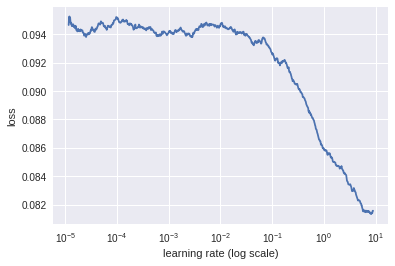

In [9]:
lr = learn.lr_find()
learn.sched.plot()

In [10]:
lr=1
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1         
    0      0.076817   0.072794   0.436502  
 24%|██▍       | 204/857 [00:07<00:22, 28.50it/s, loss=0.0761]

    1      0.073746   0.070934   0.446919  
 49%|████▉     | 423/857 [00:14<00:14, 30.13it/s, loss=0.0732]

    2      0.072989   0.070593   0.448271  
 64%|██████▍   | 548/857 [00:17<00:09, 31.36it/s, loss=0.0731]

    3      0.072636   0.070088   0.451345  
 73%|███████▎  | 622/857 [00:19<00:07, 31.33it/s, loss=0.0722]

    4      0.071489   0.069541   0.455316  
 78%|███████▊  | 668/857 [00:21<00:06, 31.35it/s, loss=0.0707]

    5      0.071621   0.069197   0.458261  
 80%|███████▉  | 683/857 [00:22<00:05, 30.50it/s, loss=0.0712]

    6      0.071458   0.069146   0.458444  



[array([0.06915]), 0.45844396469388826]

In [11]:
# Differential Learning Rates for Different Layer Groups
lrs = np.array([lr/9, lr/3, lr])

In [0]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f1         
    0      0.071439   0.068868   0.459792  
 39%|███▉      | 337/857 [03:24<05:15,  1.65it/s, loss=0.0716]

    1      0.07082    0.068806   0.459619  
 21%|██        | 177/857 [01:53<07:17,  1.55it/s, loss=0.0701]

    2      0.070738   0.068544   0.461833  
 10%|▉         | 83/857 [00:51<08:03,  1.60it/s, loss=0.071]

 65%|██████▌   | 560/857 [05:32<02:56,  1.69it/s, loss=0.0712]

In [0]:
os.makedirs('data/fashiondata/models', exist_ok=True)
os.makedirs('data/fashiondata/tmp', exist_ok=True)

In [0]:
!cd data/fashiondata && ls

images_train	       test.json	  train.json
models		       tmp		  train_req.csv
sample_submission.csv  train_created.csv  validation.json


In [0]:
from fastai.plots import *

In [0]:
im_path_downloaded = [os.path.join(PATH, 'images_train', x) for x in images_downloaded]
plots_from_files(im_path_downloaded[:2])

NameError: ignored

Use full methods for handling data.

In [0]:
from fastai.imports import *
from fastai.transforms import *
from fastai.dataset import *
from sklearn.metrics import fbeta_score
import warnings

def f2(preds, targs, start=0.17, end=0.24, step=0.01):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return max([fbeta_score(targs, (preds>th), 2, average='samples')
                    for th in np.arange(start,end,step)])

def opt_th(preds, targs, start=0.17, end=0.24, step=0.01):
    ths = np.arange(start,end,step)
    idx = np.argmax([fbeta_score(targs, (preds>th), 2, average='samples')
                for th in ths])
    return ths[idx]

def get_data(path, tfms,bs,  n, cv_idx):
    val_idxs = get_cv_idxs(n, cv_idx)
    return ImageClassifierData.from_csv(path, 'train-jpg', f'{path}train_v2.csv', bs, tfms,
                                 suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

def get_data_zoom(f_model, path, sz, bs, n, cv_idx):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return get_data(path, tfms, bs, n, cv_idx)

def get_data_pad(f_model, path, sz, bs, n, cv_idx):
    transforms_pt = [RandomRotateZoom(9, 0.18, 0.1), RandomLighting(0.05, 0.1), RandomDihedral()]
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_pt, pad=sz//12)
    return get_data(path, tfms, bs, n, cv_idx)

In [0]:
metrics=[f2]
f_model = resnet34

In [0]:
PATH = 'data/fashiondata/'
label_csv = f'{PATH}train_req.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [0]:
def get_data(sz):
    tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    return ImageClassifierData.from_csv(PATH, 'images_train', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='images_test')

In [0]:
data = get_data(256)

In [0]:
x,y = next(iter(data.val_dl))

In [0]:
x

tensor([[[[ 2.0605e+00,  2.0605e+00,  2.0605e+00,  ...,  1.6944e+00,
            1.7099e+00,  1.7099e+00],
          [ 2.0605e+00,  2.0605e+00,  2.0605e+00,  ...,  1.6898e+00,
            1.6838e+00,  1.6838e+00],
          [ 2.0605e+00,  2.0605e+00,  2.0605e+00,  ...,  1.6772e+00,
            1.6601e+00,  1.6601e+00],
          ...,
          [ 3.7415e-01,  2.9455e-01,  3.0980e-01,  ...,  9.7088e-03,
           -1.0577e-01, -9.2540e-02],
          [ 2.9013e-01,  2.9428e-01,  3.0578e-01,  ...,  1.9394e-01,
           -6.3553e-02, -1.7671e-01],
          [ 2.9013e-01,  2.9428e-01,  3.0578e-01,  ...,  1.9394e-01,
            5.8679e-02, -1.6648e-01]],

         [[ 2.0784e+00,  2.0784e+00,  2.0784e+00,  ...,  1.7041e+00,
            1.7199e+00,  1.7199e+00],
          [ 2.0784e+00,  2.0784e+00,  2.0784e+00,  ...,  1.6994e+00,
            1.6933e+00,  1.6933e+00],
          [ 2.0784e+00,  2.0784e+00,  2.0784e+00,  ...,  1.6866e+00,
            1.6691e+00,  1.6691e+00],
          ...,
     

In [0]:
y

tensor([[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  ...,  1.,  0.,  0.]])

In [0]:
list(zip(data.classes, y[0]))

[('1', tensor(0.)),
 ('10', tensor(0.)),
 ('100', tensor(0.)),
 ('101', tensor(0.)),
 ('102', tensor(0.)),
 ('103', tensor(0.)),
 ('104', tensor(0.)),
 ('105', tensor(0.)),
 ('106', tensor(0.)),
 ('107', tensor(0.)),
 ('108', tensor(0.)),
 ('109', tensor(0.)),
 ('11', tensor(0.)),
 ('110', tensor(0.)),
 ('111', tensor(0.)),
 ('112', tensor(0.)),
 ('113', tensor(0.)),
 ('114', tensor(0.)),
 ('115', tensor(0.)),
 ('116', tensor(0.)),
 ('117', tensor(0.)),
 ('118', tensor(0.)),
 ('119', tensor(0.)),
 ('12', tensor(0.)),
 ('120', tensor(0.)),
 ('121', tensor(0.)),
 ('122', tensor(0.)),
 ('123', tensor(0.)),
 ('124', tensor(0.)),
 ('125', tensor(0.)),
 ('126', tensor(0.)),
 ('127', tensor(0.)),
 ('128', tensor(0.)),
 ('129', tensor(0.)),
 ('13', tensor(0.)),
 ('130', tensor(0.)),
 ('131', tensor(0.)),
 ('132', tensor(0.)),
 ('133', tensor(0.)),
 ('134', tensor(0.)),
 ('135', tensor(0.)),
 ('136', tensor(0.)),
 ('137', tensor(1.)),
 ('138', tensor(0.)),
 ('139', tensor(0.)),
 ('14', tensor(0

In [0]:
sz=64

In [0]:
data = get_data(sz)

In [0]:
data = data.resize(int(sz*1.3), 'tmp')